# 今年の「13日の金曜日」は何回ある？

<div style="text-align:center;font-style:oblique;font-weight:bold;" > --- あるいは、僕が「13日の金曜日」について知っている2、3のこと ---</div>
<br/>

## また「13日の金曜日」がやってくる。

2015年のある日、次の打ち合わせの確認でカレンダーを眺めると、その日が「13日の金曜日」になることに気がついた。 
なんだかついこの間の打ち合わせも「13日の金曜日」だったようが気がする。 
なぜだろうと気になったので、ちょっと調べてみようとPythonのNotebookを開いてみた。

## pythonプログラムをつかって「13日」の金曜日は他の曜日に比べて多いのか少ないのか？を調べてみる。

手始めに、”「13日の金曜日」が他の曜日に比べ多いとか、少ないとかいうことがあるのか？” を確かめてみることから初めてみよう。

まずは、いつものおまじないと、日付データを取り扱うための`datetime`モジュールをインポートしておこう。

In [1]:
#!python
#-*- coding:utf-8 -*-
# python2/python3の互換性のために
from __future__ import print_function
# 日付データを取り扱うためのモジュールをインポートしておく。
import datetime

準備が出来たところでm2021年から2121年までの100年間にある毎月の13の曜日の頻度を数え上げてみればいいだろう。

In [2]:
#　月曜から日曜の曜日の名前を定義しておきます。
wdname_e=("mon","tue","wed","thu","fri","sat","sun")
# 日本語での名前
wdname_j=(u"月",u"火",u"水",u"木", u"金", u"土", u"日")
wdname=wdname_j

wdcount={} #曜日毎の回数を覚えておくための辞書型データを用意する。

ny=100 #100年分を調べてみます。
for y in range(2021,2021+ny): #range(2021,2022)->(2021,2022,...,2120)
    for m in range(1,13,1): #range(1,13,1) -> (1,2,...,12)
        d=datetime.datetime(y,m,13) # y年m月13日の日付データを作成。
        wd=d.weekday() # その日の曜日を取り出す。
        wdcount[wd] = wdcount.get(wd,0) + 1 #wdcountのkeyがwdのデータに1を加える。

print("曜日","回数" )
for k in range(7): # 曜日毎の登場回数を印刷する。
    print (wdname[k], wdcount[k])

曜日 回数
月 171
火 172
水 172
木 170
金 171
土 172
日 172


これらは単純な平均値 $ 171.4= 100\times\frac{12}{7}$ に一致している。
当たり前だけど、特に13日は金曜日が多いとか、その逆というわけではない。こ
の分布を曜日毎の回数を示すバーグラフにすれば、わかりやすいだろうか。

## グラフを書いてみる。

グラフを描くためのモジュールはいくつかあるが、これもいつものように`matplotlib`を使うことにする。
`matplotlib`のサブモジュール`pyplot`は簡単なグラフの作成にはピッタリだ。
細部にまで凝るなら`matplotlib`のオブジェクトを使いこなすことになる。

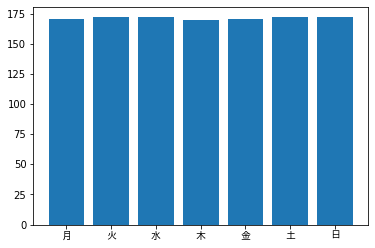

In [3]:
import matplotlib.pyplot as pyplot  #matplotli.pyplot を pyplotという名前で使うことにする。
pyplot.bar(wdcount.keys(), wdcount.values(),align="center") #バーグラフを使ってグラフ化する。
# pyplot.bar(*zip(*wdcount.items()),align="center") #こういう書き方もある。
pyplot.xticks(range(7), wdname_j, font="IPAexGothic") # x軸のラベルを曜日にしておこう。
pyplot.draw()

## 毎年の「13日の金曜日」の回数を数えてみよう。

このように、毎年の「13日の金曜日」は毎年 12/7=1.7回 あるわけだが、1回の年もあれば、2回の年もあるだろう。
もう一度Python スクリプト をつかって、毎年の「13日の金曜日」の回数を数えて確かめなければならない。

In [4]:
F13inY={} #年毎の「13日の金曜日」の回数を記録する辞書型データ`F13inY`を用意する。
def count_F13inY(year):
    count=0 # カウンタ countを0クリアする。
    for m in range(1,13,1): # 毎月の
        d=datetime.datetime(year,m,13) #13日が
        wd=d.weekday() # 曜日が
        if wd == 4:# 金曜日(4)だったら
            count +=1 # カウンタを1増やす。
    return count

for y in range(2015,2115):
    count=count_F13inY(y)
    F13inY[count] = F13inY.get(count,0)+1 # 一年あたりの「13日の金曜日」の回数がcountとなる年数を1増やす

for k, v in F13inY.items(): # 一年あたりの「13日の金曜日」の回数がkのなる年数を印刷する。
    print (k,"occurense ", v,"times")   

3 occurense  16 times
1 occurense  43 times
2 occurense  41 times


プログロラムの結果では、2015-2114の100年間で、「13日の金曜日」が1日しか無い年が43回、2日ある年が42回、 そしてなんと「年に3日の「13日の金曜日」を持つ」当たり年が16回ある。 まあ、この平均は確かに、

In [5]:
(43+2*42+3*15)/100. 

1.72

となり、 平均すれば均等な確率による結果通りになってはいるんだけれど。

## 年に3回の「13日の金曜日」がある年を探して。

それではとこの100年のうち「13日の金曜日」が3回有るのはどの年かを調べてみたくなる。
次のプログラムを使うと、2015-1214年の100年間には、

 2015, 2026, 2037, 2040, 2043, 2054, 2065, 2068, 2071, 2082, 2093, 2096, 2099, 2105, 2108, そして 2111

の16回であることがわかる。

確かに今年(2015)は3回の「13日の金曜日」がある年で、「またか」と思ったのもそのためだろう。

このプログラムをつかえば、次に「年に3回の『13日の金曜日』」がある次の年がわかってしまう。
それはなんと2026年だとプログラムは教えてくれる。 当分は「えっ、また『13日の金曜日』」と感じる様な年は巡ってこないわけだ。

In [6]:
years=[]
for y in range(2015,2115):
    count=count_F13inY(y)
    if count >=3:
        print ("year",y, "has ",count, "day(s) of \"Friday 13th\"")
        years.append(y)
print(len(years), years)

year 2015 has  3 day(s) of "Friday 13th"
year 2026 has  3 day(s) of "Friday 13th"
year 2037 has  3 day(s) of "Friday 13th"
year 2040 has  3 day(s) of "Friday 13th"
year 2043 has  3 day(s) of "Friday 13th"
year 2054 has  3 day(s) of "Friday 13th"
year 2065 has  3 day(s) of "Friday 13th"
year 2068 has  3 day(s) of "Friday 13th"
year 2071 has  3 day(s) of "Friday 13th"
year 2082 has  3 day(s) of "Friday 13th"
year 2093 has  3 day(s) of "Friday 13th"
year 2096 has  3 day(s) of "Friday 13th"
year 2099 has  3 day(s) of "Friday 13th"
year 2105 has  3 day(s) of "Friday 13th"
year 2108 has  3 day(s) of "Friday 13th"
year 2111 has  3 day(s) of "Friday 13th"
16 [2015, 2026, 2037, 2040, 2043, 2054, 2065, 2068, 2071, 2082, 2093, 2096, 2099, 2105, 2108, 2111]


プログラムを短くするためにこんな書き方もできるらしい。

In [7]:
years=[y for y in range(2015,2115) if count_F13inY(y)>=3 ] # 3回(以上)の 「13日の金曜日」がある年のリスト
for y in years:
    print ("year",y, "has ","more than 3 days of \"Friday 13th\"")
print()
print(len(years), years)

year 2015 has  more than 3 days of "Friday 13th"
year 2026 has  more than 3 days of "Friday 13th"
year 2037 has  more than 3 days of "Friday 13th"
year 2040 has  more than 3 days of "Friday 13th"
year 2043 has  more than 3 days of "Friday 13th"
year 2054 has  more than 3 days of "Friday 13th"
year 2065 has  more than 3 days of "Friday 13th"
year 2068 has  more than 3 days of "Friday 13th"
year 2071 has  more than 3 days of "Friday 13th"
year 2082 has  more than 3 days of "Friday 13th"
year 2093 has  more than 3 days of "Friday 13th"
year 2096 has  more than 3 days of "Friday 13th"
year 2099 has  more than 3 days of "Friday 13th"
year 2105 has  more than 3 days of "Friday 13th"
year 2108 has  more than 3 days of "Friday 13th"
year 2111 has  more than 3 days of "Friday 13th"

16 [2015, 2026, 2037, 2040, 2043, 2054, 2065, 2068, 2071, 2082, 2093, 2096, 2099, 2105, 2108, 2111]


この結果をよくみると、2015-2065までは、「13日の金曜日が年に3回ある年」は大体11年あるいは13年の間をおいて現ている。
しかし(2065,2068,2071) および(2093,2096, 2099) は三年おきの間隔で"「13日の金曜日が年に3回ある年"が繰り返している。

これは過去の繰り返しも調べてみる必要があるだろう。

In [8]:
years=[]
for y in range(1915,2016):
    count=count_F13inY(y)
    if count >=3:
        print ("year",y, "has ",count, "day(s) of \"Friday 13th\"")
        years.append(y)
print(len(years), years)

year 1925 has  3 day(s) of "Friday 13th"
year 1928 has  3 day(s) of "Friday 13th"
year 1931 has  3 day(s) of "Friday 13th"
year 1942 has  3 day(s) of "Friday 13th"
year 1953 has  3 day(s) of "Friday 13th"
year 1956 has  3 day(s) of "Friday 13th"
year 1959 has  3 day(s) of "Friday 13th"
year 1970 has  3 day(s) of "Friday 13th"
year 1981 has  3 day(s) of "Friday 13th"
year 1984 has  3 day(s) of "Friday 13th"
year 1987 has  3 day(s) of "Friday 13th"
year 1998 has  3 day(s) of "Friday 13th"
year 2009 has  3 day(s) of "Friday 13th"
year 2012 has  3 day(s) of "Friday 13th"
year 2015 has  3 day(s) of "Friday 13th"
15 [1925, 1928, 1931, 1942, 1953, 1956, 1959, 1970, 1981, 1984, 1987, 1998, 2009, 2012, 2015]


1915-2015の間では、(1925, 1928, 1931), (1953, 1956, 1959)および(2009,2012,2015)も「三年おきの間隔で「13日の金曜日が年に3回ある年が繰り返す」時期に当たっていることが判明する。 その意味でも2015年はちょっとだけ特別な年であったわけだ。

次の「三年おきの間隔で「13日の金曜日が年に3回ある年が繰り返す」期間は2037年ー2043年ということになる。
その頃にはまた、”最近13日の金曜日が多いな”と思ったりするのだろうか。

（終)

## おまけ

### 『1年間にある13日の金曜日の日数』の分布。

グレゴリオ歴は400年でちょうど、1460972日、20870週となるので、分布のパターンは400年の周期を持つ。 もし、この日数がちょうど7で割り切れるここで考えているような曜日の繰り返しは2800年の周期をもっていただろう。

この400年の周期の間に『1年間にある13日の金曜日の日数』の分布をグラフにしてみよう。

2 occurense  170 times
1 occurense  171 times
3 occurense  59 times


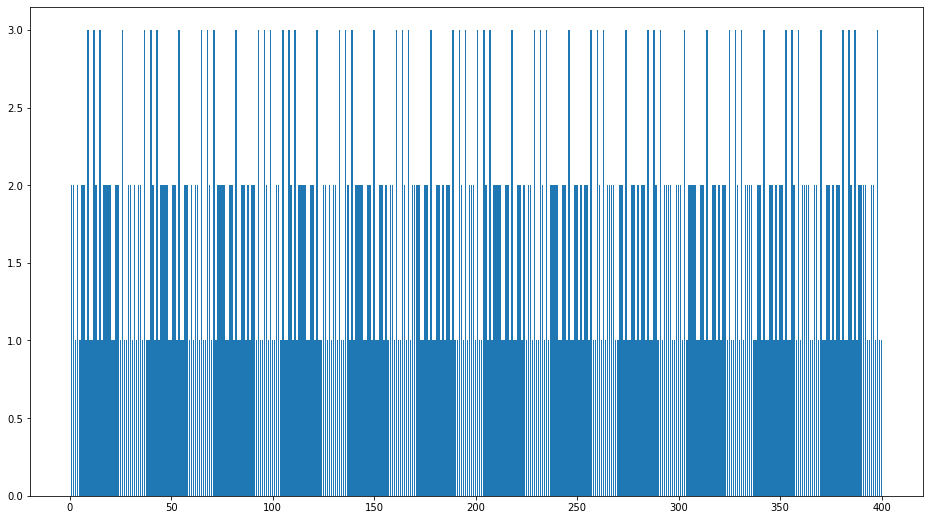

In [9]:
## %%timeit # 実行時間測定のためのおまじない(cell magic)
ymax=401
# 478 ms ± 7.68 ms per loop (mean ± std. dev. of 7 runs, 1 loop each) on Intel Mac with ymax=9999
# 220 ms ± 8.01 ms per loop (mean ± std. dev. of 7 runs, 1 loop each) on M1 Mac with arc -x86_64 and ymax=9999
F13inY={}

for y in range(1,ymax):
    count=count_F13inY(y)
    F13inY[count] = F13inY.get(count,0)+1
    
for k in F13inY:
    print (k, "occurense ", F13inY[k], "times") 

years=range(1,ymax)
pyplot.figure(figsize=(16,9))
pyplot.bar(years,[count_F13inY(y) for y in years])
pyplot.draw()

グレゴリオ歴では、4年に一回ある閏年が、100年に一回なくなってしまう。
この効果を見るために、100年毎に区切って分布をプロットしてみよう、

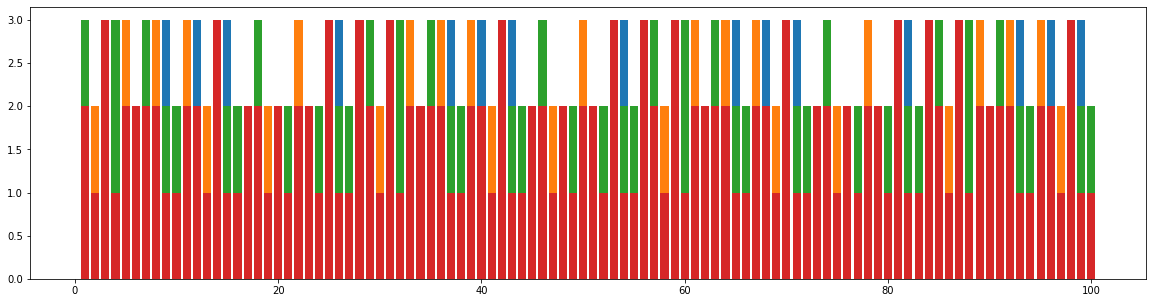

In [10]:
ny=100
years=range(1,1+ny)
pyplot.figure(figsize=(20,5))
for n in range(1,401,100):
    pyplot.bar(years,[count_F13inY(y) for y in range(n,n+ny)])
pyplot.draw()

100年

### 同じ曜日を持つ月
毎月の日数は、閏年の2月を除いては、いつも同じ。従って、1月のある日付の曜日と他の月の同じ日付の曜日は一定の関係がある。
閏年ではない、ある年の毎月の13日の曜日を調べて見る。

In [11]:
y=2021;print([(i,wdname_j[datetime.date(y,i,13).weekday()]) for i in range(1,13)])

[(1, '水'), (2, '土'), (3, '土'), (4, '火'), (5, '木'), (6, '日'), (7, '火'), (8, '金'), (9, '月'), (10, '水'), (11, '土'), (12, '月')]


このように、閏年でない年は  （1月、10月）, （2月, 3月, 11月）、 (4月、7月）、 (9月,12月） がそれぞれ同じ曜日になる。

2月がちょうど四週間＝28日なので、2月と3月は1-28日の曜日が繰り返すのはよくわかる。

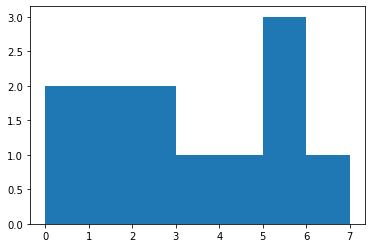

In [12]:
pyplot.hist([datetime.date(y,i,13).weekday() for i in range(1,13)],bins=range(0,8));

では閏年にはどうなるだろうか？　2月が29日あるので、3月の曜日は2月の同じ日付から一つズレるはずだ。

In [13]:
y=2020;print([(i,wdname_j[datetime.date(y,i,13).weekday()]) for i in range(1,13)])

[(1, '月'), (2, '木'), (3, '金'), (4, '月'), (5, '水'), (6, '土'), (7, '月'), (8, '木'), (9, '日'), (10, '火'), (11, '金'), (12, '日')]


というわけで、閏年には、(1月、4月,7月）, (2月、8月）, (3月、11月), (9月、12月) がそれぞれ同じ曜日となるこわけだ。

ついでに、どの年でも 3月と11月、4月と7月、9月と12月はそれぞれ,31日を除けば、同じ日付の日は同じ曜日となる。

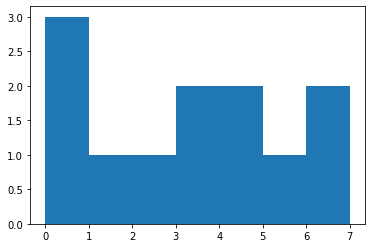

In [14]:
pyplot.hist([datetime.date(y,i,13).weekday() for i in range(1,13)],bins=range(0,8));

最後に月の31日の曜日の関係をみてみると。

閏年の年には、

In [15]:
y=2020;print([(i,wdname_j[datetime.date(y,i,31).weekday()]) for i in (1,3,5,7,8,10,12)])

[(1, '金'), (3, '火'), (5, '日'), (7, '金'), (8, '月'), (10, '土'), (12, '木')]


閏年でない年には、

In [16]:
y=2021;print([(i,wdname_j[datetime.date(y,i,31).weekday()]) for i in (1,3,5,7,8,10,12)])

[(1, '日'), (3, '水'), (5, '月'), (7, '土'), (8, '火'), (10, '日'), (12, '金')]


となるので、31日は、『閏年には、一月と七月、それ以外の年には一月と十月が同じ曜日となる。』ことがわかる。